In [106]:
import numpy as np
import matplotlib.pyplot as plt
import LinearRegression as LR
import importlib
importlib.reload(LR)

<module 'LinearRegression' from 'e:\\Subject_folder\\人工智能与机器学习\\HW1\\LinearRegression.py'>

OLS: [[9.51430572 0.99866128]]


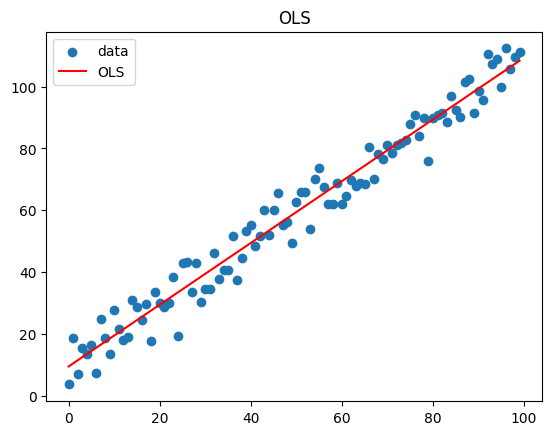

In [14]:
# generate data
np.random.seed(30)
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b + np.random.normal(0, 5, size=X_train.shape)
y_train = y_train.reshape(-1)

# fit the model
model = LR.LinearRegression()
model.init_weights()
W0 = model.OLS(X_train, y_train)
print("OLS:", W0.T)
# plot the OLS result
plt.plot(figsize=(6, 4))
plt.scatter(X_train, y_train, label='data')
plt.plot(X_train, model.predict(X_train), label='OLS', color='red')
plt.legend()
plt.title('OLS')
plt.show()

超参数调整：learning_rate, epoch
1.对于无归一化的情况，由于输入X过大，学习率必须很低，否则容易梯度爆炸。但是如果学习率过低，会导致偏置项bias在少轮次内很难收敛到正确值
2.对于有归一化的情况，输入被规范到0-1内，可适当增大学习率，提高收敛速率。如果学习率过低，也会导致收敛过慢，难以到正确值。

SGD
Without normalization: [[9.09401502 1.05141906]]
Min-Max normalization: [[9.67319789 1.00023073]]
Mean normalization: [[9.74212325 0.9935424 ]]


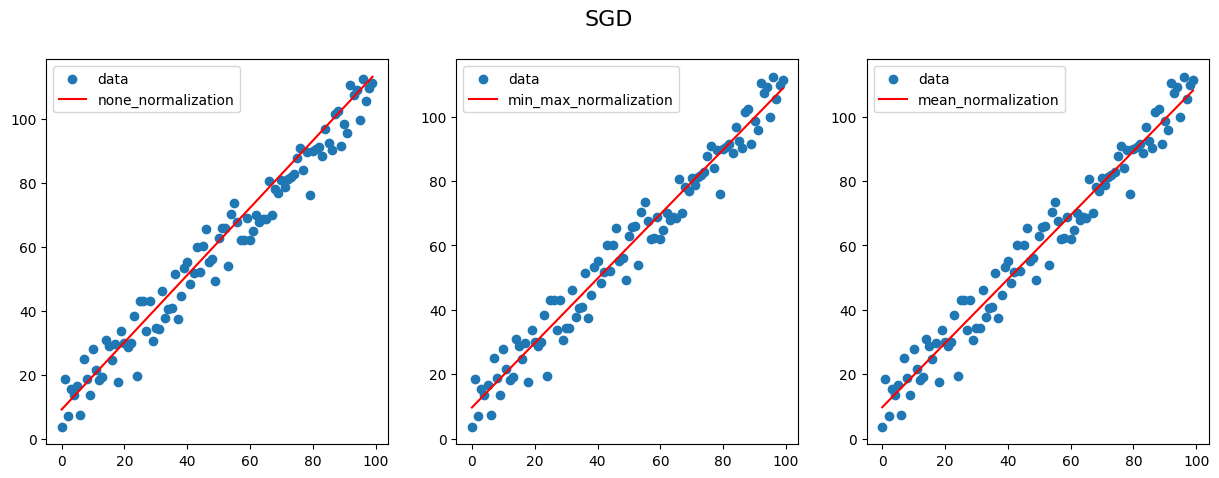

In [108]:
model_1 = LR.LinearRegression(learning_rate = 0.00025, epoch=50000)
model_2 = LR.LinearRegression(learning_rate = 0.01, epoch=50000)
model_3 = LR.LinearRegression(learning_rate = 0.01, epoch=50000)

# compare SGD
model_1.init_weights()
W1_1 = model_1.SGD(X_train, y_train)
model_2.init_weights()
model_2.SGD(model_2.min_max_normalization(X_train), y_train)
W1_2 = model_2.mapping(X_train, method="min_max")
model_3.init_weights()
model_3.SGD(model_3.mean_normalization(X_train), y_train)
W1_3 = model_3.mapping(X_train, method="mean")
print("SGD")
print("Without normalization:", W1_1.T)
print("Min-Max normalization:", W1_2.T)
print("Mean normalization:", W1_3.T)

# plot the SGD result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_train, y_train, label='data')
axes[0].plot(X_train, model_1.predict(X_train), label='none_normalization', color='red')
axes[0].legend()

axes[1].scatter(X_train, y_train, label='data')
axes[1].plot(X_train, model_2.predict(model_2.min_max_normalization(X_train)), label='min_max_normalization', color='red')
axes[1].legend()

axes[2].scatter(X_train, y_train, label='data')
axes[2].plot(X_train, model_3.predict(model_3.mean_normalization(X_train)), label='mean_normalization', color='red')
axes[2].legend()

fig.suptitle('SGD', fontsize=16)
plt.show()

BGD
Without normalization: [[9.04916914 1.00567393]]
Min-Max normalization: [[9.51430572 0.99866128]]
Mean normalization: [[9.51430572 0.99866128]]


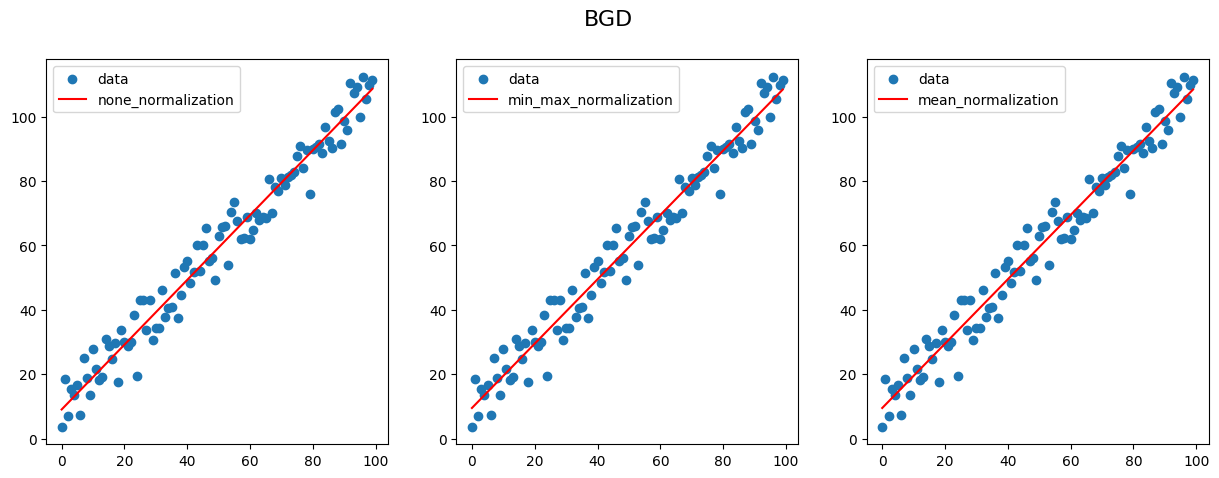

In [97]:
# compare BGD
model_1.init_weights()
W2_1 = model_1.BGD(X_train, y_train)
model_2.init_weights()
model_2.BGD(model_2.min_max_normalization(X_train), y_train)
W2_2 = model_2.mapping(X_train, method="min_max")
model_3.init_weights()
model_3.BGD(model_3.mean_normalization(X_train), y_train)
W2_3 = model_3.mapping(X_train, method="mean")
print("BGD")
print("Without normalization:", W2_1.T)
print("Min-Max normalization:", W2_2.T)
print("Mean normalization:", W2_3.T)

# plot the BGD result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_train, y_train, label='data')
axes[0].plot(X_train, model_1.predict(X_train), label='none_normalization', color='red')
axes[0].legend()

axes[1].scatter(X_train, y_train, label='data')
axes[1].plot(X_train, model_2.predict(model_2.min_max_normalization(X_train)), label='min_max_normalization', color='red')
axes[1].legend()

axes[2].scatter(X_train, y_train, label='data')
axes[2].plot(X_train, model_3.predict(model_3.mean_normalization(X_train)), label='mean_normalization', color='red')
axes[2].legend()

fig.suptitle('BGD', fontsize=16)
plt.show()


MBGD
Without normalization: [[9.51239133 0.87534555]]
Min-Max normalization: [[9.56434764 0.99815436]]
Mean normalization: [[9.68718192 0.99524089]]


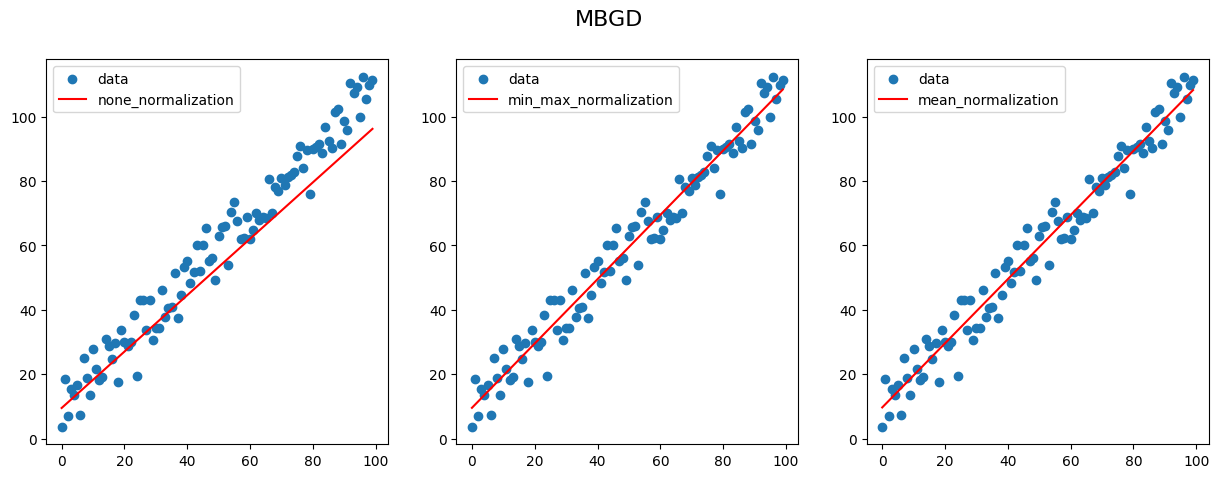

In [99]:
# compare MBGD
model_1.init_weights()
W2_1 = model_1.MBGD(X_train, y_train)
model_2.init_weights()
model_2.MBGD(model_2.min_max_normalization(X_train), y_train)
W2_2 = model_2.mapping(X_train, method="min_max")
model_3.init_weights()
model_3.MBGD(model_3.mean_normalization(X_train), y_train)
W2_3 = model_3.mapping(X_train, method="mean")
print("MBGD")
print("Without normalization:", W2_1.T)
print("Min-Max normalization:", W2_2.T)
print("Mean normalization:", W2_3.T)

# plot the MBGD result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_train, y_train, label='data')
axes[0].plot(X_train, model_1.predict(X_train), label='none_normalization', color='red')
axes[0].legend()

axes[1].scatter(X_train, y_train, label='data')
axes[1].plot(X_train, model_2.predict(model_2.min_max_normalization(X_train)), label='min_max_normalization', color='red')
axes[1].legend()

axes[2].scatter(X_train, y_train, label='data')
axes[2].plot(X_train, model_3.predict(model_3.mean_normalization(X_train)), label='mean_normalization', color='red')
axes[2].legend()

fig.suptitle('MBGD', fontsize=16)
plt.show()
